<a href="https://colab.research.google.com/github/YounesseELH/Machine-learning-Basics/blob/main/Linear%20Regression/Regression_with_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Import data**

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving data_Reg_One_Variable.txt to data_Reg_One_Variable.txt


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['data_Reg_One_Variable.txt']),header=None,names=['Population','Profit'],sep=",")

In [11]:
df.head(8)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000


In [12]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


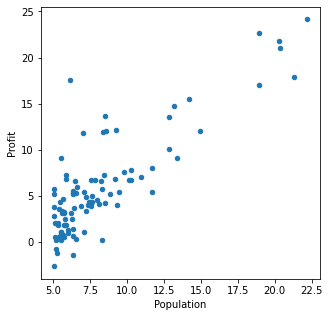

In [13]:
df.plot(kind='scatter',x='Population',y='Profit',figsize=(5,5))

**Adding new column**

In [14]:
df.insert(0,'Ones',1)

In [15]:
df.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


**Separation**

In [55]:
col = df.shape[1]
x = df.iloc[:,0:col-1]
y = df.iloc[:,col-1:col]

In [29]:
print(x.head(2))
print("=======")
print(y.head(2))

   Ones  Population
0     1      6.1101
1     1      5.5277
    Profit
0  17.5920
1   9.1302


**Convert from data frames to numpy matrices**

In [56]:
x = np.matrix(x.values)
y = np.matrix(y.values)

In [26]:
print(x)
print("====")
print(x.shape)
print("====")
print(y)
print("====")
print(y.shape)



[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [31]:
theta = np.matrix(np.array([0,0]))

In [33]:
print(theta)
print(theta)

[[0 0]]
[[0 0]]


**Cost function**

In [40]:
def CostF(x,y,theta):
  z = np.power(((x*theta.T)-y),2)
  return np.sum(z)/(2*len(x))


In [41]:
print("Values of cost function is :",CostF(x,y,theta))

Values of cost function is : 32.072733877455676


**Gradient descent : This is greaaaat**

In [42]:
def gradientDescentF(x,y,theta,alpha,iters):
  temp = np.matrix(np.zeros(theta.shape))
  param = int(theta.ravel().shape[1])
  cost = np.zeros(iters)
  for i in range(iters):
    error = ((x*theta.T)-y)
    for j in range(param):
      term = np.multiply(error,x[:,j])
      temp[0,j] = theta[0,j]-((alpha/len(x))*np.sum(term))

    theta = temp
    cost[i] = CostF(x,y,theta)
  return theta,cost




In [50]:
alpha = 0.01
iters = 100000

In [51]:
g,cost = gradientDescentF(x,y,theta,alpha,iters)

In [52]:
print("g: ",g)

g:  [[-3.89578088  1.19303364]]


In [57]:
print("Values of cost function is :",CostF(x,y,g))

Values of cost function is : 4.476971375975179


**Best Fit Line**

In [59]:
x = np.linspace(df.Population.min(),df.Population.max(),100)
f = g[0,0] + (g[0,1]*x)

**Draw the line**

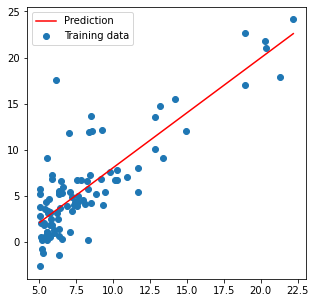

In [60]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(df.Population,df.Profit,label='Training data')
ax.legend(loc=2)

**Draw error line**

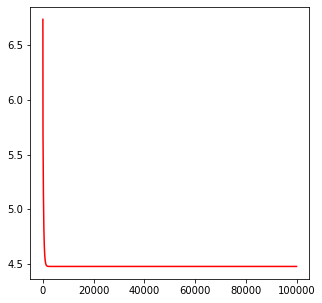

In [62]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters),cost,'r')
